# IMPORT LIBRARIES

# <span style="color:#FF5733">📊**CUSTOMER DATASET ANALYSIS USING K-MEANS CLUSTERING**</span>

---

## <span style="color:#2980B9">🔹 **INTRODUCTION**</span>
The **Customer Dataset** provides valuable insights into customer demographics and behavior with the following features:  
- **Genre** → Gender of the customer.  
- **Age** → Age in years.  
- **Annual Income (k$)** → Yearly income in thousand dollars.  
- **Spending Score (1-100)** → A score assigned based on customer spending patterns.  

This dataset is widely used for **Customer Segmentation**, a fundamental concept in marketing analytics.  

---

## <span style="color:#27AE60">🔹 **OBJECTIVE OF NOTEBOOK**</span>
The main aim of this notebook is to:  
1. Perform **Exploratory Data Analysis (EDA)** to understand patterns in Age, Income, and Spending Score.  
2. Apply **Feature Extraction** to identify the most relevant attributes for clustering.  
3. Use the **Elbow Method** to find the optimal number of clusters (K).  
4. Apply **K-Means Clustering** to segment customers into distinct groups.  
5. Visualize the **customer segments** and interpret them for meaningful insights.  

---

## <span style="color:#8E44AD">🔹 **METHODOLOGY**</span>

1. **Data Visualization**  
   - Scatter plots and histograms were used to analyze distributions and relationships among features.  
   - Visualization helped in understanding which features are most important for clustering.  

2. **Feature Extraction**  
   - Identified **Annual Income** and **Spending Score** as the most important features for clustering.  
   - These features reflect the financial capacity and spending habits of customers.  

3. **Finding Optimal K (Elbow Method)**  
   - The Elbow Method was applied on the **Within-Cluster Sum of Squares (WCSS)**.  
   - From the elbow curve, the optimal number of clusters was determined.  

4. **K-Means Clustering**  
   - Customers were grouped into distinct segments.  
   - Each cluster represents a unique type of customer (e.g., high income–low spending, young high spenders, etc.).  

---

## <span style="color:#D35400">🔹 **RESULTS & INSIGHTS**</span>

- The clustering revealed **clear customer segments**.  
- Example interpretations:  
  - **Cluster 1**: High income but low spending customers.  
  - **Cluster 2**: Young, high-spending customers.  
  - **Cluster 3**: Average income and balanced spending customers.  

These insights are useful for **targeted marketing strategies**, loyalty programs, and personalized recommendations.  

---

## <span style="color:#C0392B">🔹 **CONCLUSION**</span>

Through **K-Means Clustering** on the Customer Dataset:  
- We identified meaningful **customer groups**.  
- **Annual Income** and **Spending Score** emerged as the most critical features.  
- This analysis demonstrates how simple unsupervised learning methods can generate **actionable business insights**.  

---

# <span style="color:#2ECC71">✅ **FINAL NOTE**</span>
This notebook is a practical demonstration of **K-Means Clustering** for real-world customer segmentation.  
It highlights the **power of data visualization, feature extraction, and unsupervised learning** in uncovering patterns from data.  


# 📦 IMPORTING LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
# 📦 Importing Warnings Library
import warnings

# 👇 Ignore all warnings
warnings.filterwarnings("ignore")


In [10]:
df=pd.read_csv('/kaggle/input/customer-data/Mall_Customers.csv')

In [11]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **DATA INSIGHT**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


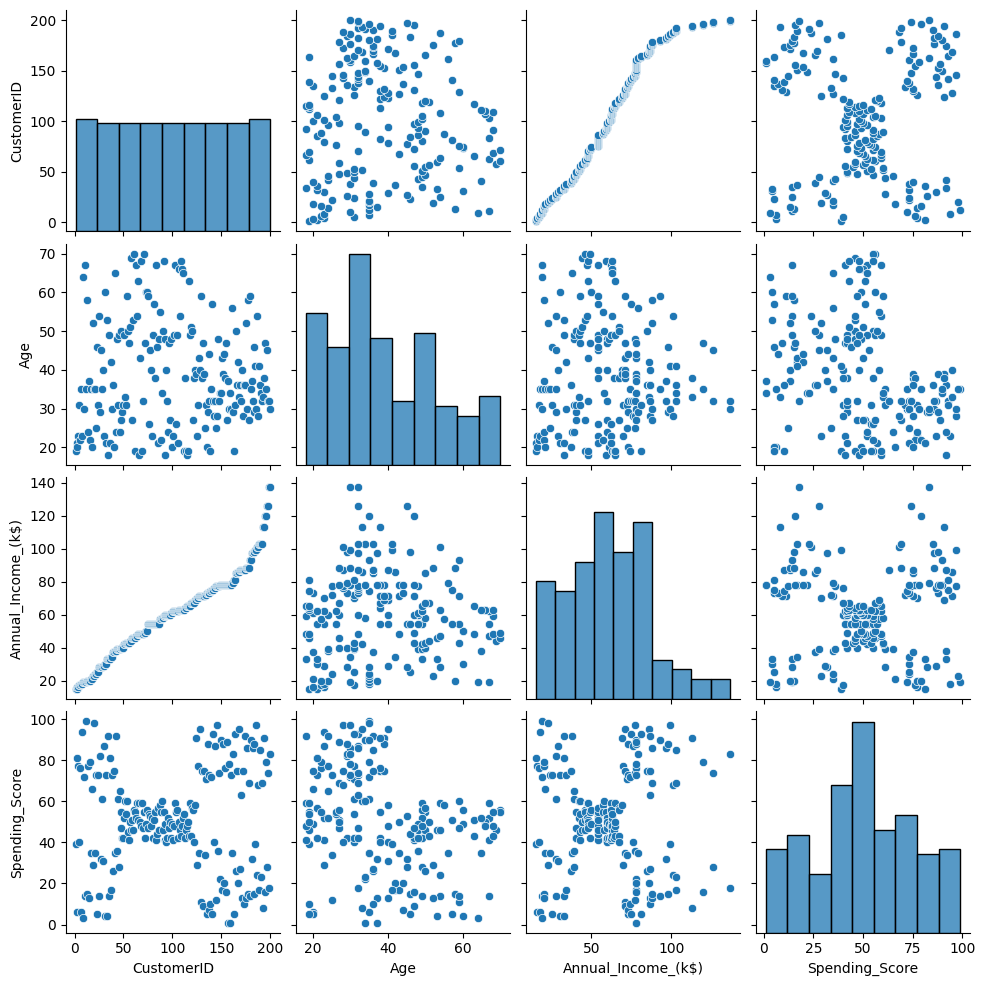

In [14]:
sns.pairplot(df)

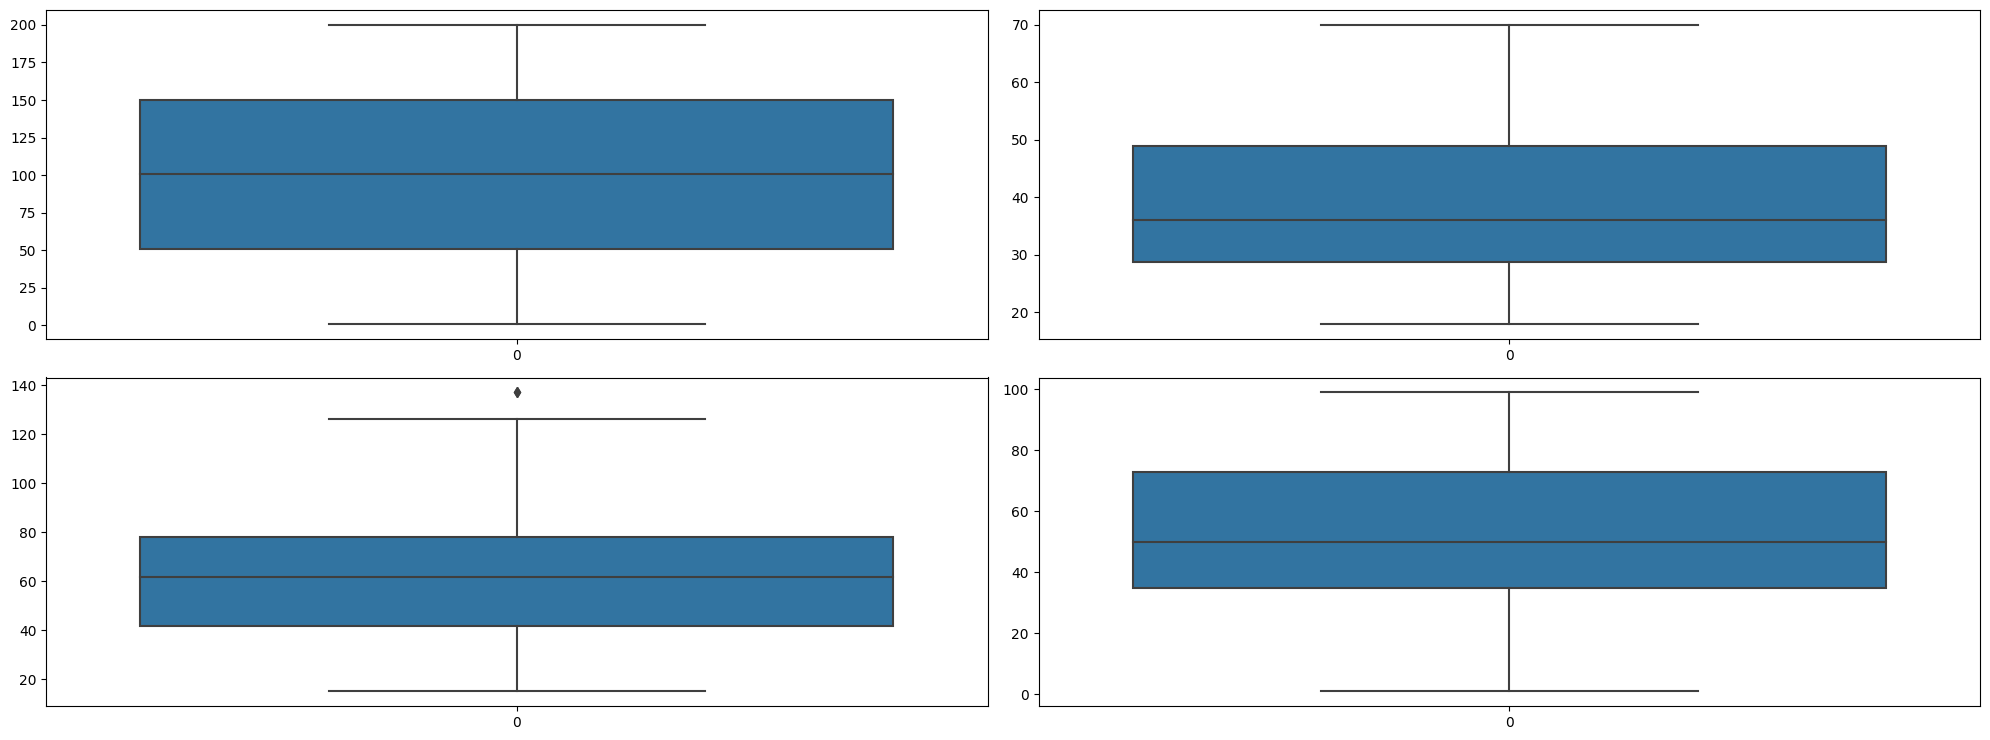

In [21]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.boxplot(df['CustomerID'], ax = axs[0,0])
plt2 = sns.boxplot(df['Age'], ax = axs[0,1])
plt3 = sns.boxplot(df['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(df['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

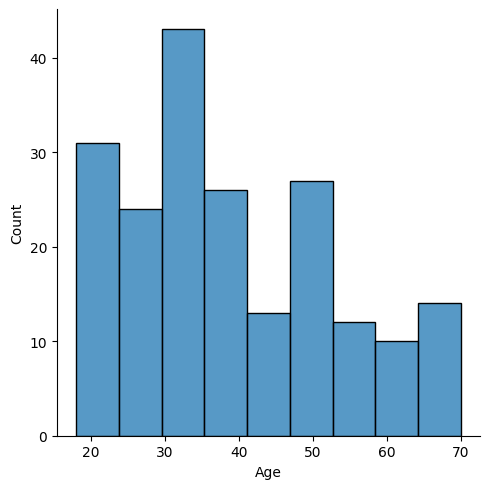

In [22]:
# AGE
sns.displot(df['Age'])

we can see the mostly visted custmer age range from 30-35

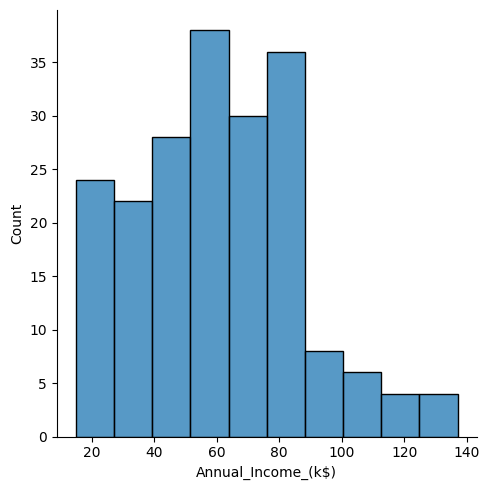

In [23]:
# AGE
sns.displot(df['Annual_Income_(k$)'])

insgiht from this plot is that that most of customer income is b/w 50k$ to 85k$

In [24]:
#lets understang the gender feature
df['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

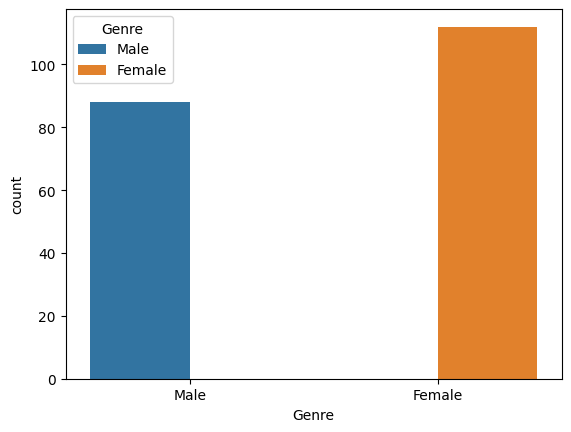

In [25]:
sns.countplot(x='Genre',data=df,hue='Genre')

In [26]:
plt.figure(figsize=(4,6))
fig = pt.pie(
    df,
    names="Genre",       # column for categories

    title="Genre",
    hole=0                # set to >0 (like 0.4) for donut chart
)

# Show chart
fig.show()

<Figure size 400x600 with 0 Axes>

Text(0, 0.5, 'Number of Customers')

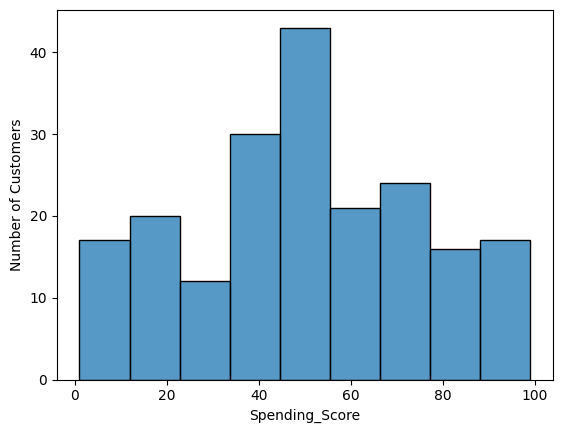

In [27]:
sns.histplot(df['Spending_Score'])
plt.ylabel('Number of Customers')

<Axes: xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

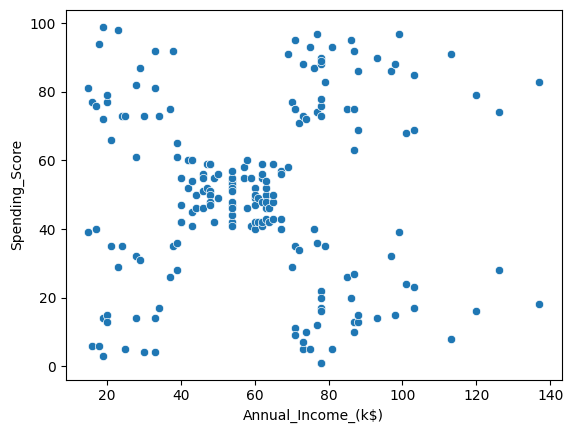

In [28]:
sns.scatterplot(x='Annual_Income_(k$)',y='Spending_Score',data=df)

This looks promising, we can see our customers seem to fall into \~5 categories:

1.  **Low** income, **high** spending.
2.  **High** income, **low** spending.
3.  **Low** income, **low** spending.
4.  **High** income, **low** spending.
5.  **Medium** income, **medium** spending.

If we manage to segment our existing customers into these 5 categories, we will obtain exactly the information John requires:


# MODEL TRANINIG



```
# SELECT THE FEATURE FOR MODEL WHICH IS HAVE SOME CLUSTERING PATTERN
```



In [29]:
xlabel = 'Annual_Income_(k$)'
ylabel = 'Spending_Score'
X = df[[xlabel, ylabel]]

In [30]:
#k=5 forM DATA WE CAN SEE THAT 5 DIFFFERENT TYPE OF CLUSTER ARE MAKING
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(X)

KMeans(n_clusters=5)

In [ ]:
km.labels_

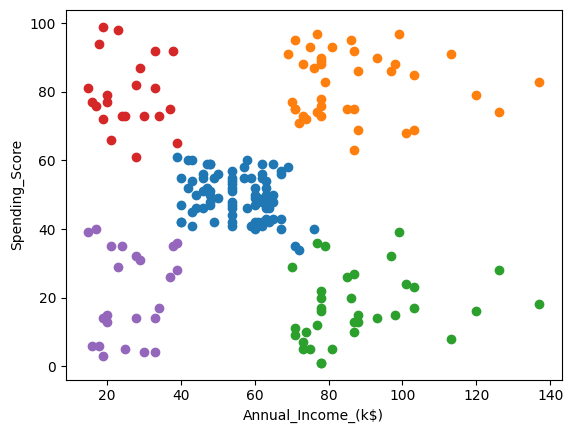

In [31]:
for label in np.unique(km.labels_):
    X_ = X[label == km.labels_]
    plt.scatter(X_['Annual_Income_(k$)'], X_['Spending_Score'], label=label)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

## ELBOW METHOD

In [32]:
#Finding best value of k
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

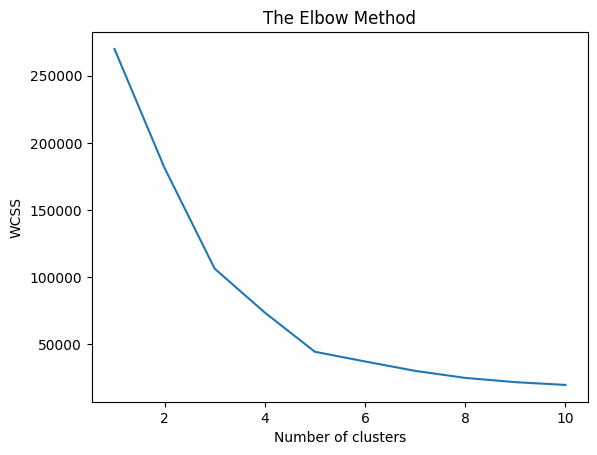

In [33]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From graph we can see that best value of k is 5